<a href="https://colab.research.google.com/github/simranwork/projects/blob/main/black_friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#import  train dataset
df_train = pd.read_csv('train.csv')
df_train.tail()

In [ ]:
#import test dataset
df_test = pd.read_csv('test.csv')
df_test.tail()

In [ ]:
#merge both datasets for preprocessing
df = pd.merge(df_train,df_test,how = 'left')
df

In [125]:
#merge both datasets for preprocessing way 2
'''
df = df_train.append(df_test)
df.head()
'''

'\ndf = df_train.append(df_test)\ndf.head()\n'

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67760 entries, 0 to 67759
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     67760 non-null  int64  
 1   Product_ID                  67759 non-null  object 
 2   Gender                      67759 non-null  object 
 3   Age                         67759 non-null  object 
 4   Occupation                  67759 non-null  float64
 5   City_Category               67759 non-null  object 
 6   Stay_In_Current_City_Years  67759 non-null  object 
 7   Marital_Status              67759 non-null  float64
 8   Product_Category_1          67759 non-null  float64
 9   Product_Category_2          46523 non-null  float64
 10  Product_Category_3          20613 non-null  float64
 11  Purchase                    67759 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 6.7+ MB


In [ ]:
df.describe()

In [ ]:
df = df.drop(columns = 'User_ID')
df.head()

In [128]:
#age is a categorical feature let's change it into numerical feature

In [164]:
# get_dummies jse ki gender me m and f the to usne usko 0 nd 1 me krliya aur ab index wise 0 and 1 se indicate krega ki wo male h ya female
#pd.get_dummies(df['Gender'])#,prefix = 'hi',prefix_sep = '.')
#df.head()

In [165]:
#another way to do it  is using map func
df['Gender'] = df['Gender'].map({'M':0,'F':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969


In [166]:
# Import label encoder
'''
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Gender']= label_encoder.fit_transform(df['Gender'])

df['Gender'].unique()
'''

"\nfrom sklearn import preprocessing\n\n# label_encoder object knows\n# how to understand word labels.\nlabel_encoder = preprocessing.LabelEncoder()\n\n# Encode labels in column 'species'.\ndf['Gender']= label_encoder.fit_transform(df['Gender'])\n\ndf['Gender'].unique()\n"

In [167]:
df.head(50)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969
5,P00193542,0,26-35,15,A,3,0,1,2.0,NaN,15227
6,P00184942,0,46-50,7,B,2,1,1,8.0,17.0,19215
7,P00346142,0,46-50,7,B,2,1,1,15.0,NaN,15854
8,P0097242,0,46-50,7,B,2,1,1,16.0,NaN,15686
9,P00274942,0,26-35,20,A,1,1,8,NaN,NaN,7871


In [168]:
#handling age
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])

df['Age'].unique()


array([0, 6, 2, 4, 5, 3, 1])

In [169]:
df.head(15)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0,10,A,2,0,3,NaN,NaN,8370
1,P00248942,1,0,10,A,2,0,1,6.0,14.0,15200
2,P00087842,1,0,10,A,2,0,12,NaN,NaN,1422
3,P00085442,1,0,10,A,2,0,12,14.0,NaN,1057
4,P00285442,0,6,16,C,4+,0,8,NaN,NaN,7969
5,P00193542,0,2,15,A,3,0,1,2.0,NaN,15227
6,P00184942,0,4,7,B,2,1,1,8.0,17.0,19215
7,P00346142,0,4,7,B,2,1,1,15.0,NaN,15854
8,P0097242,0,4,7,B,2,1,1,16.0,NaN,15686
9,P00274942,0,2,20,A,1,1,8,NaN,NaN,7871


In [170]:
#fixing city_category
df_city = pd.get_dummies(df['City_Category'],drop_first = True)
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
550063,1,0
550064,0,1
550065,1,0
550066,0,1


In [171]:
df = pd.concat([df,df_city],axis = 1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,A,2,0,3,NaN,NaN,8370,0,0
1,P00248942,1,0,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,1,0,10,A,2,0,12,NaN,NaN,1422,0,0
3,P00085442,1,0,10,A,2,0,12,14.0,NaN,1057,0,0
4,P00285442,0,6,16,C,4+,0,8,NaN,NaN,7969,0,1


In [173]:
#drop city category
df=df.drop(columns ='City_Category',axis = 1)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,2,0,3,NaN,NaN,8370,0,0
1,P00248942,1,0,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,1,0,10,2,0,12,NaN,NaN,1422,0,0
3,P00085442,1,0,10,2,0,12,14.0,NaN,1057,0,0
4,P00285442,0,6,16,4+,0,8,NaN,NaN,7969,0,1


In [174]:
df.isnull().sum()     #to check missing values

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
B                                  0
C                                  0
dtype: int64

In [175]:
df.isnull()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,False,False,False,False,False,False,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,True,True,False,False,False
550064,False,False,False,False,False,False,False,True,True,False,False,False
550065,False,False,False,False,False,False,False,True,True,False,False,False
550066,False,False,False,False,False,False,False,True,True,False,False,False


In [176]:
#Product_Category_2 and Product_Category_3 have null values

df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [177]:
df['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [178]:
#replace NaN with mode   #use fillna()
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df.head(10)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,2,0,3,8.0,NaN,8370,0,0
1,P00248942,1,0,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,1,0,10,2,0,12,8.0,NaN,1422,0,0
3,P00085442,1,0,10,2,0,12,14.0,NaN,1057,0,0
4,P00285442,0,6,16,4+,0,8,8.0,NaN,7969,0,1
5,P00193542,0,2,15,3,0,1,2.0,NaN,15227,0,0
6,P00184942,0,4,7,2,1,1,8.0,17.0,19215,1,0
7,P00346142,0,4,7,2,1,1,15.0,NaN,15854,1,0
8,P0097242,0,4,7,2,1,1,16.0,NaN,15686,1,0
9,P00274942,0,2,20,1,1,8,8.0,NaN,7871,0,0


In [179]:
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [180]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,2,0,3,8.0,16.0,8370,0,0
1,P00248942,1,0,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,1,0,10,2,0,12,8.0,16.0,1422,0,0
3,P00085442,1,0,10,2,0,12,14.0,16.0,1057,0,0
4,P00285442,0,6,16,4+,0,8,8.0,16.0,7969,0,1


In [181]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
dtype: int64

In [147]:
df.head(10)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C,B,C
0,P00069042,1,0,10,A,2,0,3.0,8.0,8.0,8370.0,0,0,0,0
1,P00248942,1,0,10,A,2,0,1.0,6.0,6.0,15200.0,0,0,0,0
2,P00087842,1,0,10,A,2,0,12.0,8.0,8.0,1422.0,0,0,0,0
3,P00085442,1,0,10,A,2,0,12.0,14.0,14.0,1057.0,0,0,0,0
4,P00285442,0,6,16,C,4+,0,8.0,8.0,8.0,7969.0,0,1,0,1
5,P00193542,0,2,15,A,3,0,1.0,2.0,2.0,15227.0,0,0,0,0
6,P00184942,0,4,7,B,2,1,1.0,8.0,8.0,19215.0,1,0,1,0
7,P00346142,0,4,7,B,2,1,1.0,15.0,15.0,15854.0,1,0,1,0
8,P0097242,0,4,7,B,2,1,1.0,16.0,16.0,15686.0,1,0,1,0
9,P00274942,0,2,20,A,1,1,8.0,8.0,8.0,7871.0,0,0,0,0


In [182]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [183]:
# replace 4+ with 4
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')
df.head()

<ipython-input-183-7ec6b3bbe678>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,2,0,3,8.0,16.0,8370,0,0
1,P00248942,1,0,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,1,0,10,2,0,12,8.0,16.0,1422,0,0
3,P00085442,1,0,10,2,0,12,14.0,16.0,1057,0,0
4,P00285442,0,6,16,4,0,8,8.0,16.0,7969,0,1


In [184]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
dtype: int64

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  uint8  
 11  C                           550068 non-null  uint8  
dtypes: float64(2), int64(6), object(2), uint8(2)
memory usage: 47.2+ MB


In [186]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [187]:
df['B']=df['B'].astype(int)

In [189]:
df['C']=df['C'].astype(int)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  int64  
 11  C                           550068 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 54.6+ MB


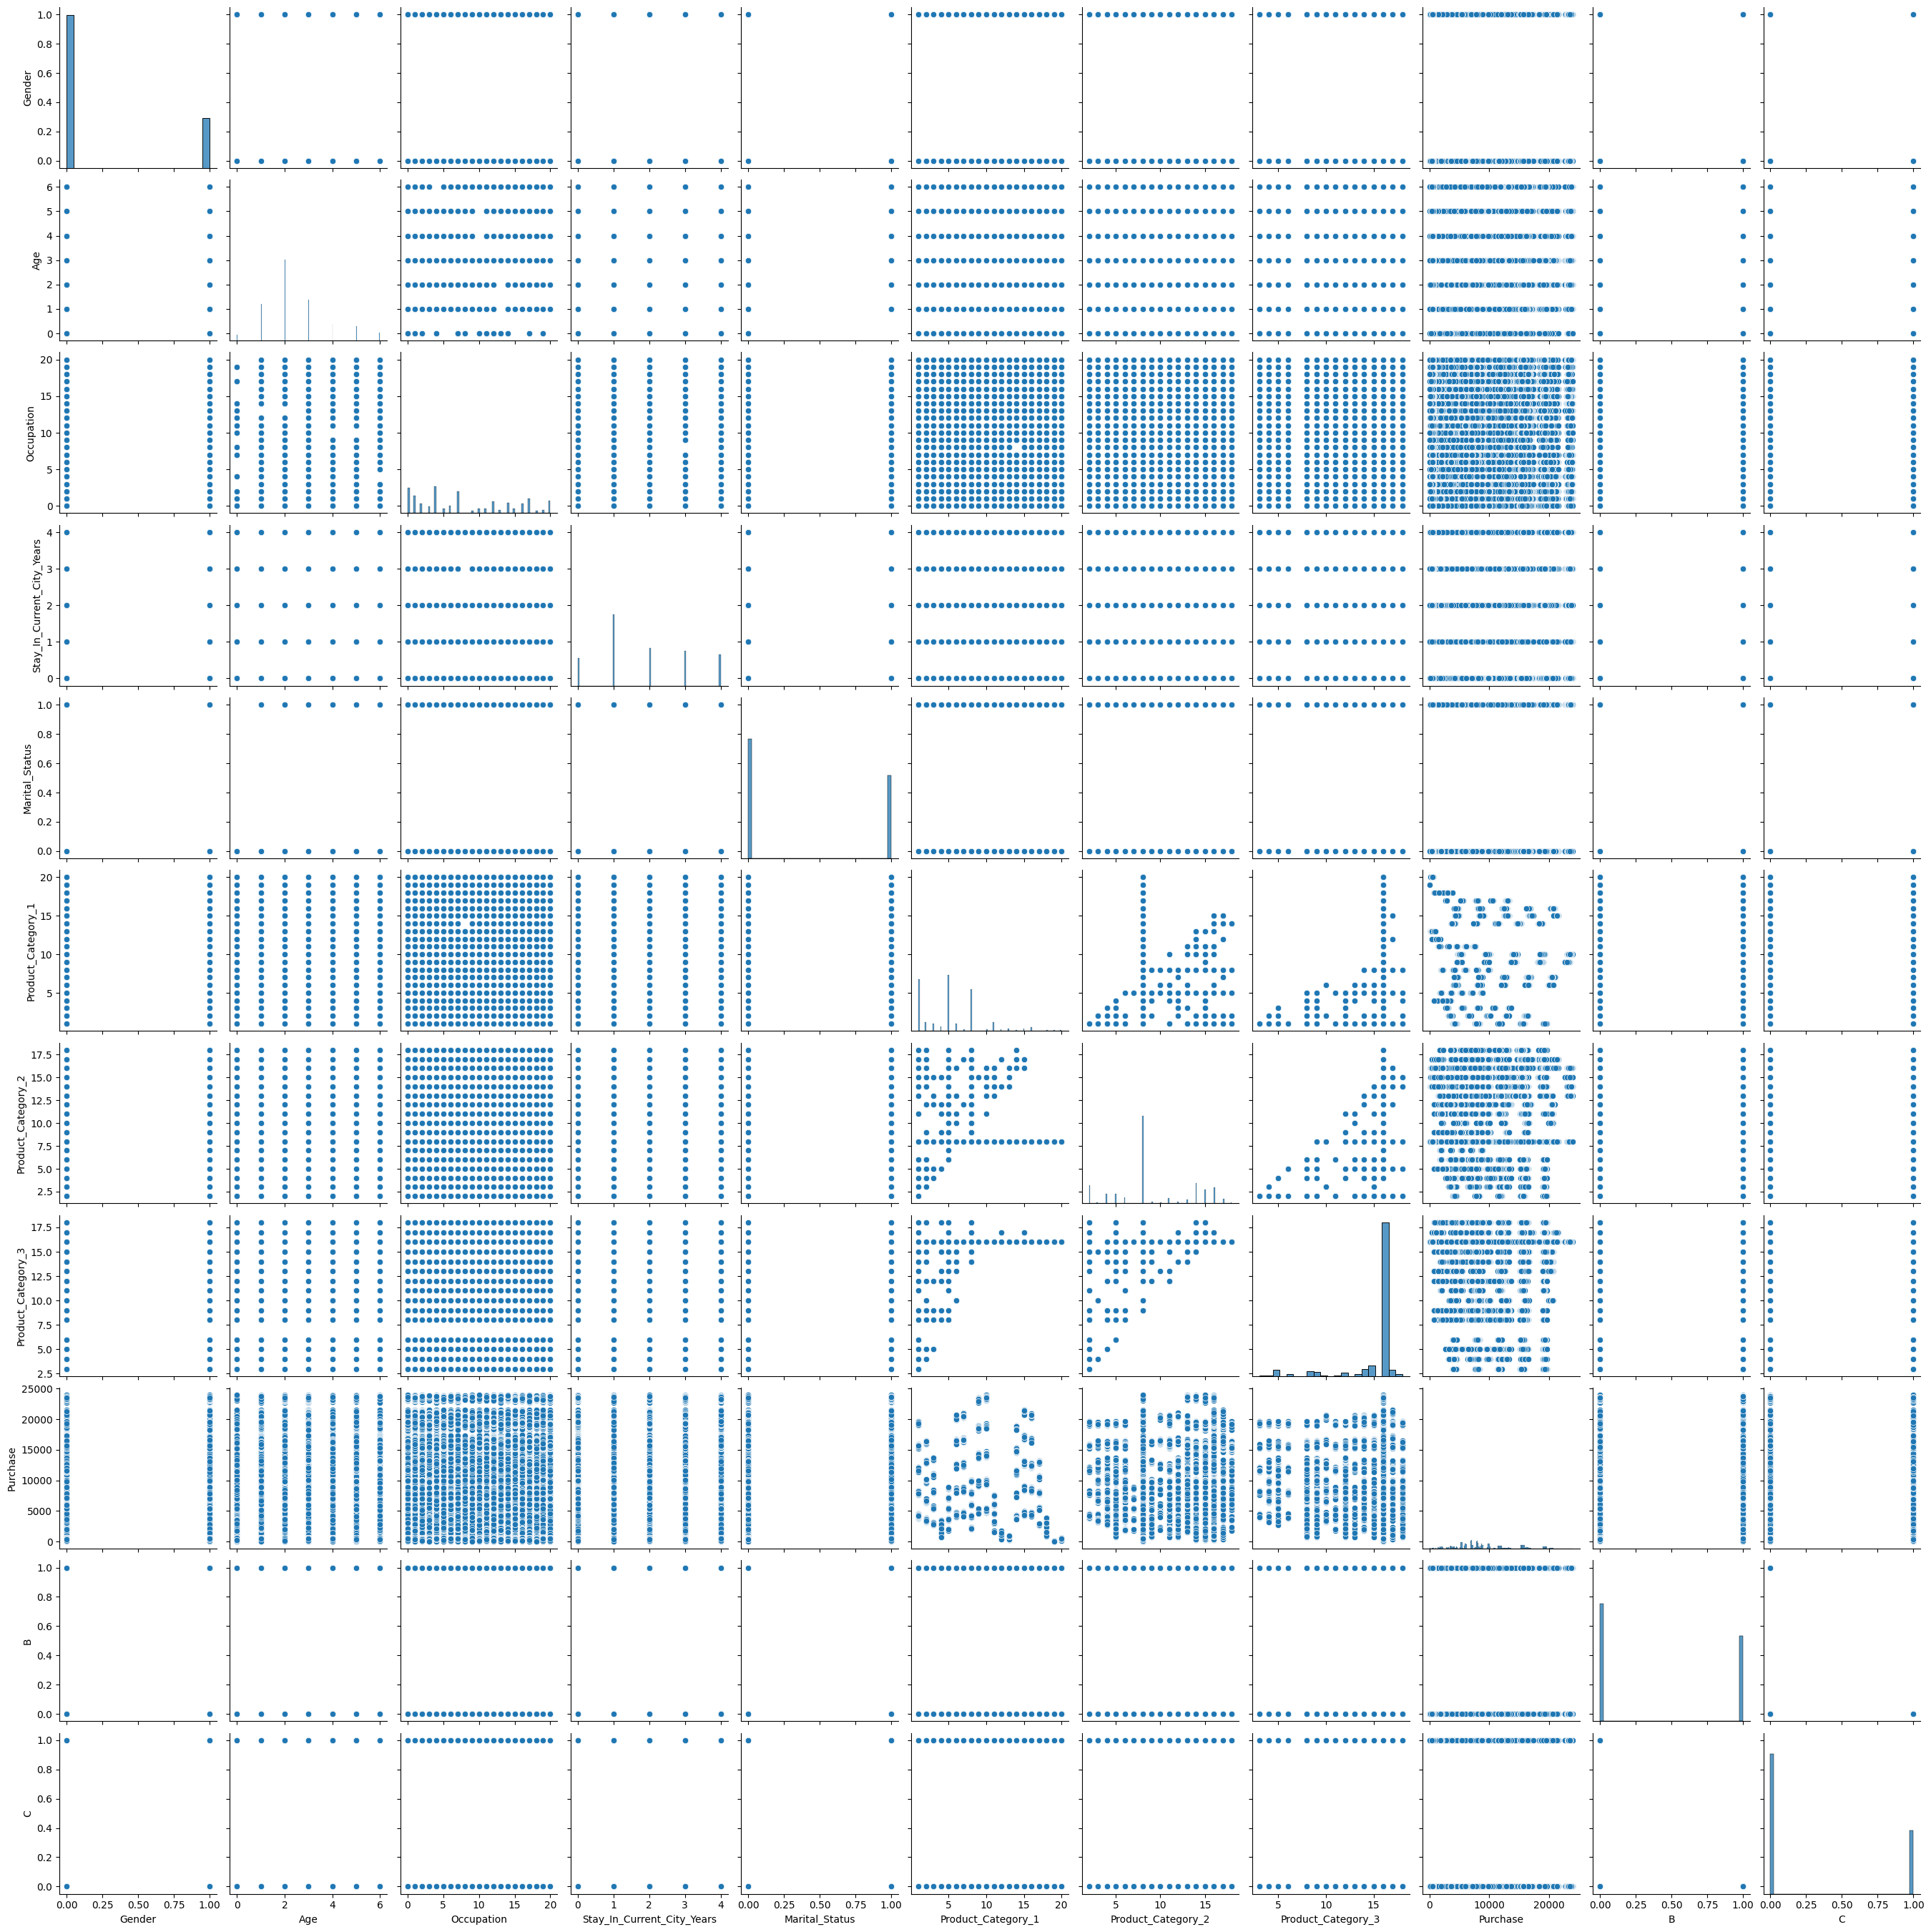

In [191]:
sns.pairplot(df)

In [ ]:
plt.rcParams['figure.figsize']=(6,12)
sns.barplot(data = df,x = 'Age',y = 'Purchase',hue ='Gender')


In [214]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

# observation
* 51-55 males do max shopping
* 0-17 males do min shopping
* males are shopping more than females
* 36-45 females do max shopping
* 0-17 females min shopping
* max people in sample are of age group(18 to 35)
* min people in sample are of age group(0 to 17)

In [210]:
fn = df.Age.value_counts().values
fn

array([219587, 110013,  99660,  45701,  38501,  21504,  15102])

In [211]:
dn = df.Age.value_counts().index
dn

Int64Index([2, 3, 1, 4, 5, 6, 0], dtype='int64')

<Axes: xlabel='Occupation', ylabel='Purchase'>

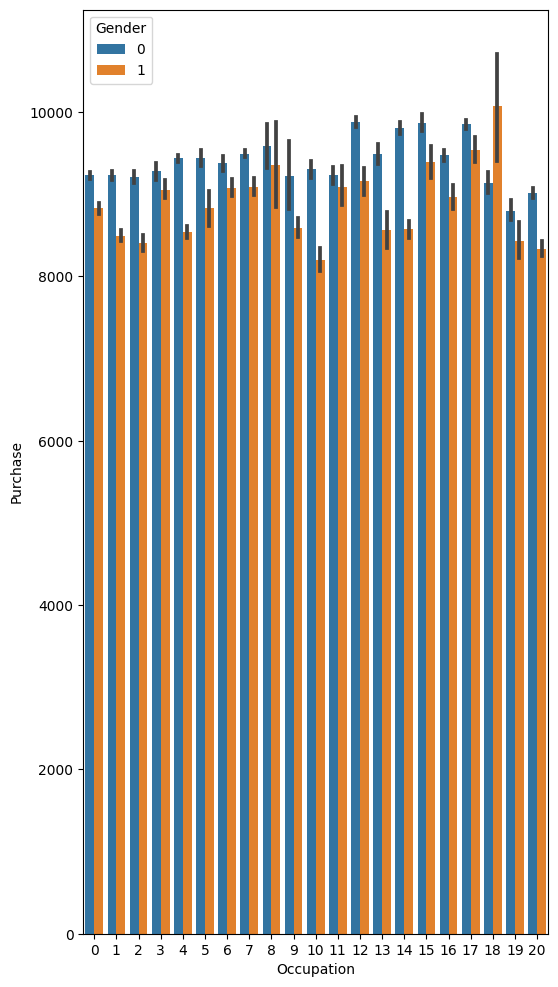

In [215]:
sns.barplot(data = df,x = 'Occupation',y = 'Purchase',hue ='Gender')

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

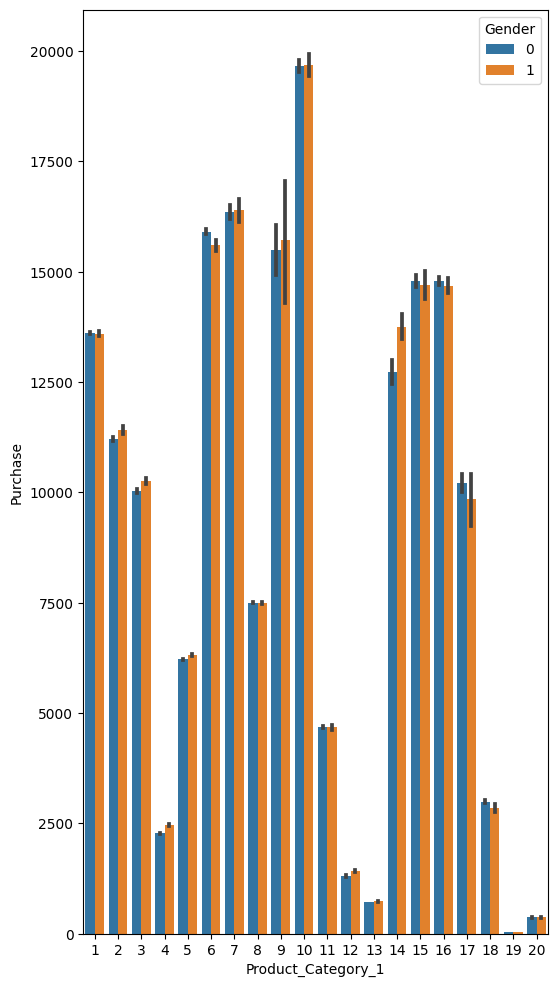

In [216]:
sns.barplot(data = df,x = 'Product_Category_1',y = 'Purchase',hue ='Gender')

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

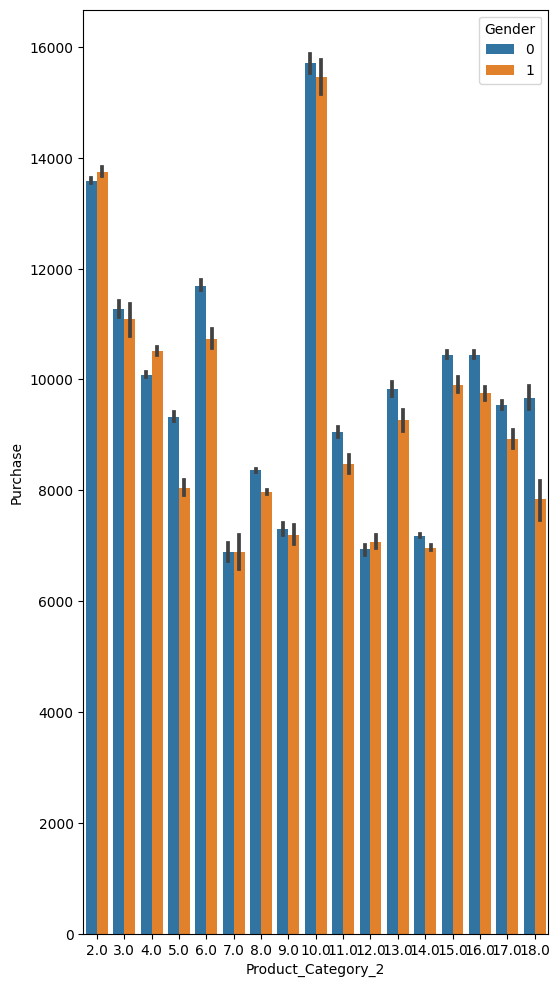

In [217]:
sns.barplot(data = df,x = 'Product_Category_2',y = 'Purchase',hue ='Gender')

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

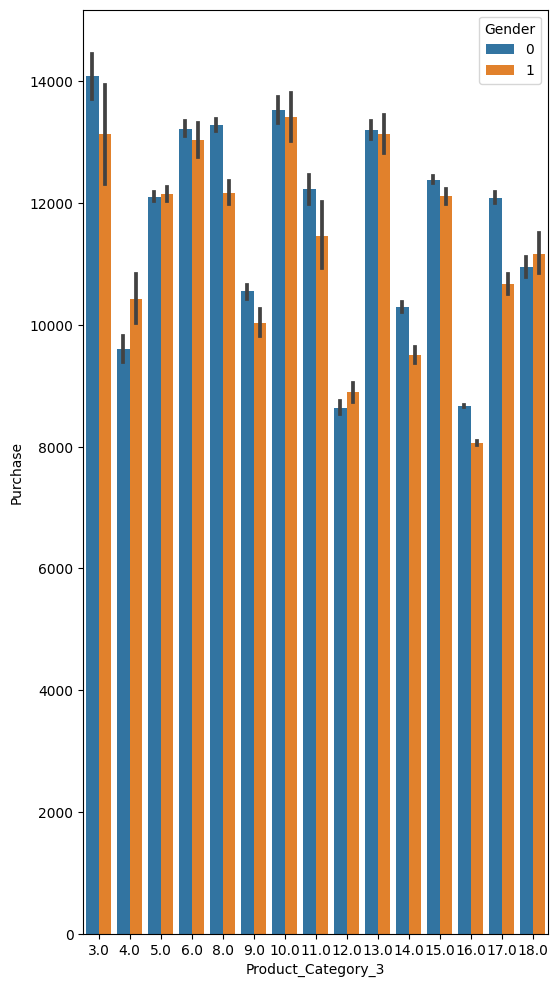

In [218]:
sns.barplot(data = df,x = 'Product_Category_3',y = 'Purchase',hue ='Gender')